In [2]:
import requests
from bs4 import BeautifulSoup

resp = requests.get('https://www.weather.go.kr/weather/observation/currentweather.jsp')
bs = BeautifulSoup(resp.text, 'lxml')
table = bs.find('table', class_='table_develop3')

data=[]

for tr in table.find_all('tr'):
    tds = list(tr.find_all('td'))
    
    for td in tds:
        if td.find('a'):
            point = td.find('a').text
            temperature = tds[5].text
            humidity = tds[9].text
            
            data.append([point,temperature,humidity])

data

[['강릉', '26.8', '81'],
 ['강진군', '28.5', '77'],
 ['강화', '23.5', '99'],
 ['거제', '27.4', '84'],
 ['거창', '28.2', '73'],
 ['경주시', '30.2', '66'],
 ['고산', '28.8', '90'],
 ['고창', '29.0', '76'],
 ['고창군', '29.2', '73'],
 ['고흥', '27.8', '83'],
 ['광양시', '28.3', '75'],
 ['광주', '28.7', '90'],
 ['구미', '28.7', '84'],
 ['군산', '29.7', '76'],
 ['금산', '29.2', '65'],
 ['김해시', '27.8', '82'],
 ['남원', '28.9', '72'],
 ['남해', '28.9', '78'],
 ['대관령', '21.8', '96'],
 ['대구', '30.5', '56'],
 ['대전', '29.0', '77'],
 ['동두천', '24.0', '100'],
 ['동해', '23.1', '96'],
 ['목포', '28.5', '82'],
 ['문경', '28.0', '82'],
 ['밀양', '29.0', '70'],
 ['백령도', '24.0', '97'],
 ['보령', '26.7', '87'],
 ['보성군', '28.3', '85'],
 ['보은', '28.1', '74'],
 ['봉화', '23.0', '95'],
 ['부산', '28.3', '79'],
 ['부안', '28.8', '77'],
 ['부여', '28.9', '76'],
 ['북강릉', '25.8', '86'],
 ['북창원', '29.7', '80'],
 ['북춘천', '23.6', '99'],
 ['산청', '27.8', '83'],
 ['상주', '29.3', '74'],
 ['서귀포', '26.9', '99'],
 ['서산', '25.0', '94'],
 ['서울', '25.1', '99'],
 ['성산', '28.7', '79'

In [3]:
#데이터를 csv 파일에 저장히기   weather.csv 

with open('weather.csv','w') as file:
    file.write('point, temperature, humidity \n')
    for i in data:
        file.write('{0},{1},{2} \n'.format(i[0],i[1],i[2]))

In [4]:
#저장한 파일을 이용해서 Dataframe 만들어서 앞에 5개만 보기!! 
%matplotlib inline
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('weather.csv',index_col='point',encoding='euc-kr')
df.head()

,temperature,humidity
point,,
강릉,26.8,81
강진군,28.5,77
강화,23.5,99
거제,27.4,84
거창,28.2,73


In [5]:

# 몇개 지역의 데이터만 모아보기!! 
# ex 서울, 인천 등 원하는 도시 7개만 모아보기
city_df = df.loc[['서울','인천','대전','대구','광주','부산','울산']]
city_df.head(3)

,temperature,humidity
point,,
서울,25.1,99
인천,24.2,97
대전,29.0,77


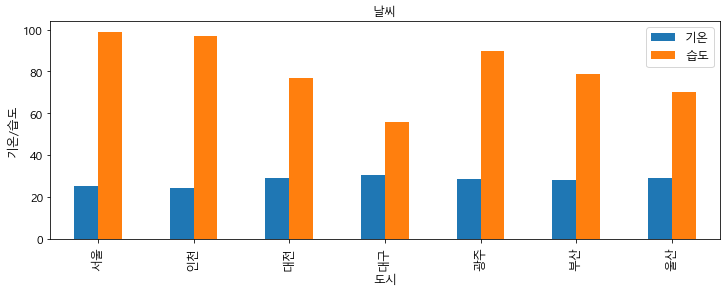

In [6]:
#기온,습도 데이터로 그래프 그래보기 
#font 설정
font_name = mpl.font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font',family=font_name)


ax = city_df.plot(kind='bar', title='도시별 기온(/습도', figsize=(12,4), legend=True, fontsize=12)
ax.set_xlabel('도시', fontsize=12)
ax.set_ylabel('기온/습도',fontsize=12)
ax.legend(['기온','습도'], fontsize=12)

In [7]:
#db에 저장해보기!! 

import pandas as pd
import cx_Oracle

try:
    con = cx_Oracle.connect('hr', 'hr', 'xe')
    cursor = con.cursor()

    rows=[]
    for x in df.to_records(index=True):   
        rows.append((x[0],x[1],int(x[2])))

    cursor.executemany("insert into weather values(:1,:2,:3)", rows)
    
except Exception as e:
    print(e)
else:
    con.commit()
finally:
    cursor.close()
    con.close()

ORA-00942: table or view does not exist


In [8]:
table =pd.read_html('https://www.weather.go.kr/weather/observation/currentweather.jsp',header=1,encoding='euc-kr')

In [9]:
point_df =table[0]

In [10]:
point_df[['지점','현재기온','습도%']]

,지점,현재기온,습도%
0,강릉,26.8,81
1,강진군,28.5,77
2,강화,23.5,99
3,거제,27.4,84
4,거창,28.2,73
...,...,...,...
90,합천,28.3,79
91,해남,29.4,79
92,홍성,27.2,84
93,홍천,24.4,94
